In [1]:
import pandas as pd
import numpy as np                  # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings  
import statistics

from sklearn import preprocessing, cross_validation, svm,neighbors
from sklearn.cluster import MeanShift
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.metrics import accuracy_score

from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

# model


    
    
    
    
train=pd.read_csv('train.csv')
bold('**Our train data:**')
display(train.head())

test=pd.read_csv('test.csv')
train_original=train.copy()
test_original=test.copy()


C:\Users\sushant\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**Our train data:**

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data_cleaner=[train, test]

In [21]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
g_train = train.groupby(['Embarked'])
col = pd.DataFrame(columns=['p'])

In [20]:
for i , c in g_train:
    print(c)

     PassengerId  Survived  Pclass  \
1              2         1       1   
9             10         1       2   
19            20         1       3   
26            27         0       3   
30            31         0       1   
31            32         1       1   
34            35         0       1   
36            37         1       3   
39            40         1       3   
42            43         0       3   
43            44         1       2   
48            49         0       3   
52            53         1       1   
54            55         0       1   
57            58         0       3   
60            61         0       3   
64            65         0       1   
65            66         1       3   
73            74         0       3   
96            97         0       1   
97            98         1       1   
111          112         0       3   
114          115         0       3   
118          119         0       1   
122          123         0       2   
125         

In [486]:
train['Name'].str.findall(f"([\w\./]+)")

0                            [Braund, Mr., Owen, Harris]
1      [Cumings, Mrs., John, Bradley, Florence, Brigg...
2                              [Heikkinen, Miss., Laina]
3      [Futrelle, Mrs., Jacques, Heath, Lily, May, Peel]
4                           [Allen, Mr., William, Henry]
5                                    [Moran, Mr., James]
6                            [McCarthy, Mr., Timothy, J]
7                     [Palsson, Master., Gosta, Leonard]
8      [Johnson, Mrs., Oscar, W, Elisabeth, Vilhelmin...
9                 [Nasser, Mrs., Nicholas, Adele, Achem]
10                   [Sandstrom, Miss., Marguerite, Rut]
11                           [Bonnell, Miss., Elizabeth]
12                    [Saundercock, Mr., William, Henry]
13                       [Andersson, Mr., Anders, Johan]
14             [Vestrom, Miss., Hulda, Amanda, Adolfina]
15                    [Hewlett, Mrs., Mary, D, Kingcome]
16                               [Rice, Master., Eugene]
17                      [Willia

**Cross Tab sex:**

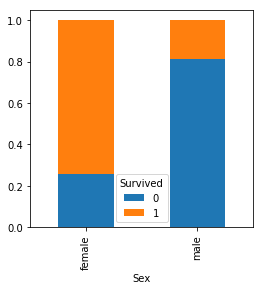

In [487]:
bold('**Cross Tab sex:**')
Gender=pd.crosstab(train['Sex'],train['Survived'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [488]:
'''Absolute frequency of Cabin.'''
abs_freq_cabin = train.Cabin.value_counts(dropna = False)
bold('**Categories of Cabin:**')
display(abs_freq_cabin.head())

"""As frequency of Cabin isn't what we expected, let's count total categories in Cabin."""
bold('**Total categories in Cabin:**')
display(abs_freq_cabin.count())


**Categories of Cabin:**

NaN            687
G6               4
C23 C25 C27      4
B96 B98          4
F33              3
Name: Cabin, dtype: int64

**Total categories in Cabin:**

148

C:\Users\sushant\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 32.20 and sigma = 49.67



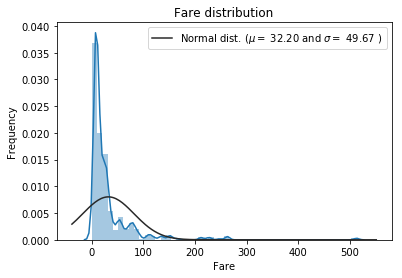

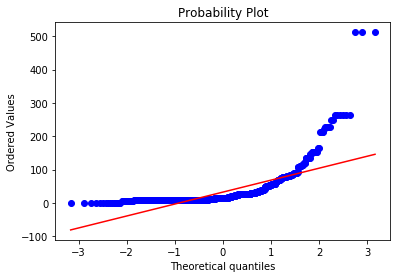

In [489]:
sns.distplot(train['Fare'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Fare'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Fare distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Fare'], plot=plt)
plt.show()

C:\Users\sushant\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


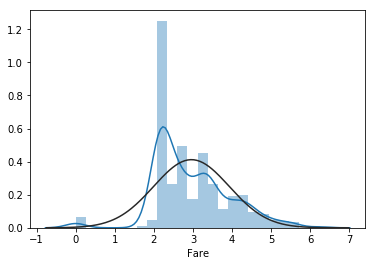

In [490]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["Fare"] = np.log1p(train["Fare"])

#Check the new distribution 
sns.distplot(train['Fare'] , fit=norm);

# # Get the fitted parameters used by the function
# (mu, sigma) = norm.fit(train['Fare'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# #Now plot the distribution
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('Frequency')
# plt.title('Fare distribution')

# #Get also the QQ-plot
# fig = plt.figure()
# res = stats.probplot(train['Fare'], plot=plt)
# plt.show()

In [491]:
# """Flag all the NaNs of Cabin as 'X'."""
# train.Cabin.fillna(value = 'X', inplace = True)

# '''Keep only the 1st character where Cabin is alphanumerical.'''
# train.Cabin = train.Cabin.apply( lambda x : x[0])
# display(train.Cabin.value_counts())

# # '''After processing, we can visualize the absolute and relative frequency of newly transformed Cabin variable.'''
# # train.Cabin.agg(absolute_and_relative_freq)

# """Flag all the NaNs of Cabin as 'X'."""
# test.Cabin.fillna(value = 'X', inplace = True)

# '''Keep only the 1st character where Cabin is alphanumerical.'''
# test.Cabin = test.Cabin.apply( lambda x : x[0])
# display(test.Cabin.value_counts())

# '''After processing, we can visualize the absolute and relative frequency of newly transformed Cabin variable.'''
# train.Cabin.agg(absolute_and_relative_freq)
for dataset in data_cleaner:
    dataset=dataset.drop(['Cabin'],1,inplace=True)

In [492]:
train['Family_size']=train['SibSp']+train['Parch']+1
# display(train.head())

Alone=[]
for i in train.Family_size:
    if i > 1 :
        Alone.append(True)
    else:
        Alone.append(False)
Alone=pd.Series(Alone)
train['Alone']=Alone


train.Alone.replace(False,0,inplace=True)

train.Alone.replace(True,1,inplace=True)


# train.head()


# Alone=train.Family_size >1


In [493]:
test['Family_size']=test['SibSp']+test['Parch']+1
# display(test.head())

In [494]:

test_Alone=test.Family_size >1
Alone=pd.Series(test_Alone)
test['Alone']=Alone

test.Alone.replace(False,0,inplace=True)

test.Alone.replace(True,1,inplace=True)




# test.head()


In [495]:
train = train.sort_values(['Pclass','Fare','Survived','Sex'])
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Alone
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.000000,S,1,0.0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.000000,S,1,0.0
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.000000,S,1,0.0
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.000000,S,1,0.0
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.000000,S,1,0.0
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,1.791759,S,1,0.0
662,663,0,1,"Colley, Mr. Edward Pomeroy",male,47.0,0,0,5727,3.280441,S,1,0.0
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,3.293055,S,1,0.0
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,3.293211,S,1,0.0
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,3.293211,S,1,0.0


In [496]:
data_cleaner=[train, test]

for dataset in data_cleaner:
    
    #complete missing age with median
    dataset['Age'].fillna(method='ffill',inplace=True)

    #complete embarked with mode
    dataset['Embarked'].fillna(method='ffill',inplace=True)

    #complete missing fare with median
    dataset['Fare'].fillna(method='ffill',inplace=True)

#quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

    dataset['Title'].replace('Mr',0,inplace=True)
    dataset['Title'].replace('Mrs',1,inplace=True)
    dataset['Title'].replace('Miss',2,inplace=True)
    dataset['Title'].replace('Master',3,inplace=True)
    dataset['Title'].replace('Dr',4,inplace=True)
    dataset['Title'].replace('Rev',5,inplace=True)
    dataset['Title'].replace('Col',6,inplace=True)
    dataset['Title'].replace('Major',7,inplace=True)
    dataset['Title'].replace('Mlle',8,inplace=True)
    dataset['Title'].replace('Don',9,inplace=True)
    dataset['Title'].replace('Jonkheer',10,inplace=True)
    dataset['Title'].replace('Capt',11,inplace=True)
    dataset['Title'].replace('Ms',12,inplace=True)
    dataset['Title'].replace('the Countess',13,inplace=True)
    dataset['Title'].replace('Sir',14,inplace=True)
    dataset['Title'].replace('Mme',15,inplace=True)
    dataset['Title'].replace('Lady',16,inplace=True)
    dataset['Title'].replace('Dona',17,inplace=True)
    
    

    

In [497]:
# train.sort_values(['Fare','Sex','Survived'])
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Alone,Title
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.000000,S,1,0.0,0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,40.0,0,0,112052,0.000000,S,1,0.0,0
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.000000,S,1,0.0,0
815,816,0,1,"Fry, Mr. Richard",male,39.0,0,0,112058,0.000000,S,1,0.0,0
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.000000,S,1,0.0,10
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,1.791759,S,1,0.0,0
662,663,0,1,"Colley, Mr. Edward Pomeroy",male,47.0,0,0,5727,3.280441,S,1,0.0,0
168,169,0,1,"Baumann, Mr. John D",male,47.0,0,0,PC 17318,3.293055,S,1,0.0,0
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,3.293211,S,1,0.0,4
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,3.293211,S,1,0.0,1


In [498]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Family_size    0
Alone          0
Title          0
dtype: int64

In [499]:
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked'] = label.fit_transform(dataset['Embarked'])
    dataset['Title'] = label.fit_transform(dataset['Title'])
#     dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

# Target = ['Survived']

# #define x variables for original features aka feature selection
# data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
# data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
# data1_xy =  Target + data1_x
# print('Original X Y: ', data1_xy, '\n')

In [500]:
train=train.drop(['Name','Ticket','PassengerId'],1)
test=test.drop(['Name','Ticket','PassengerId'],1)


In [501]:
X=train.drop('Survived',1)
# X=pd.get_dummies(X)

y=train['Survived']


In [502]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Alone,Title
263,1,1,40.0,0,0,0.0,2,1,0.0,0
633,1,1,40.0,0,0,0.0,2,1,0.0,0
806,1,1,39.0,0,0,0.0,2,1,0.0,0
815,1,1,39.0,0,0,0.0,2,1,0.0,0
822,1,1,38.0,0,0,0.0,2,1,0.0,10


In [503]:
y.head()

263    0
633    0
806    0
815    0
822    0
Name: Survived, dtype: int64

In [504]:
X.shape

(891, 10)

In [505]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

In [506]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier


In [507]:
# models =[LinearRegression,RandomForestClassifier,LogisticRegression,LinearDiscriminantAnalysis,DecisionTreeClassifier]
# for model in models:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [508]:
# pred_cv = model.predict(x_test)
accuracy_score(y_test,pred_cv)

0.5754189944134078

In [483]:

pred_test = model.predict(test)


submission=pd.read_csv("Sample_Submission.csv")

submission['Survived']=pred_test
submission['PassengerId']=test_original['PassengerId']

pred_test = model.predict(test)

pd.DataFrame(submission, columns=['PassengerId','Survived']).to_csv('logistic.csv')

TypeError: predict() missing 1 required positional argument: 'X'